In [1]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("my-data-set-cleared.csv")
df_copy = df.copy()

#get only numeric columns
df_copy = df_copy.select_dtypes(include='number')
df_numeric = df_copy.select_dtypes(include='number')


df_copy = df_copy.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df_numeric = df_numeric.drop(columns=['Unnamed: 0','Unnamed: 0.1'])


In [3]:
df_copy.head()

,win_round,win time,winner age,loser age,winner_wins,winner loses,loser wins,loser loses,winner height,loser height,winner reach,loser reach,winner leg reach,loser leg reach,method category,weight class category
0,5.0,300,30.0,40.0,12,2,14,5,68.0,68.0,68.0,69.0,39.5,38.0,0,9
1,3.0,300,28.0,35.0,27,11,28,5,73.0,72.0,73.0,73.0,42.0,40.5,0,8
2,1.0,288,33.0,28.0,21,7,11,2,75.0,73.0,80.0,74.0,45.0,41.0,3,7
3,3.0,300,27.0,29.0,6,1,12,4,61.0,65.0,61.0,67.0,36.0,38.5,0,12
4,3.0,300,29.0,35.0,13,5,14,6,71.0,73.0,72.0,75.0,40.0,43.5,0,7


In [4]:
df_copy.describe()

,win_round,win time,winner age,loser age,winner_wins,winner loses,loser wins,loser loses,winner height,loser height,winner reach,loser reach,winner leg reach,loser leg reach,method category,weight class category
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,2.391831,228.686166,28.969007,29.950534,14.443760,3.786741,14.684113,4.299261,71.376232,71.928366,72.095649,71.877668,40.196634,40.086823,3.355911,5.488711
std,1.005527,91.622236,3.618207,3.603218,7.221609,3.164465,7.555513,3.401718,10.956375,12.178074,3.899184,3.657773,2.213164,1.996907,3.503901,3.033089
min,1.000000,6.000000,19.000000,19.000000,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,60.000000,60.000000,32.000000,32.000000,0.000000,0.000000
25%,1.000000,155.000000,27.000000,28.000000,9.000000,1.000000,9.000000,2.000000,68.000000,68.000000,70.000000,70.000000,39.000000,39.000000,0.000000,4.000000
50%,3.000000,299.000000,29.000000,30.000000,13.000000,3.000000,13.000000,4.000000,71.000000,72.000000,72.000000,72.000000,40.000000,40.000000,3.000000,6.000000
75%,3.000000,300.000000,31.000000,32.000000,18.000000,5.000000,18.000000,6.000000,72.000000,72.000000,74.000000,74.000000,41.000000,41.000000,7.000000,8.000000
max,5.000000,300.000000,45.000000,45.000000,77.000000,23.000000,80.000000,21.000000,232.000000,232.000000,84.500000,84.500000,48.000000,48.000000,9.000000,16.000000


In [5]:
# #remove outlires values

df_numeric = df_numeric[(np.abs(stats.zscore(df_numeric)) <= 3).all(axis=1)]
df_copy = df_copy[(np.abs(stats.zscore(df_copy)) <= 3).all(axis=1)]

In [6]:
#normalize dataframe

normalized_df=((df_numeric-df_numeric.min())/(df_numeric.max()-df_numeric.min())).copy()

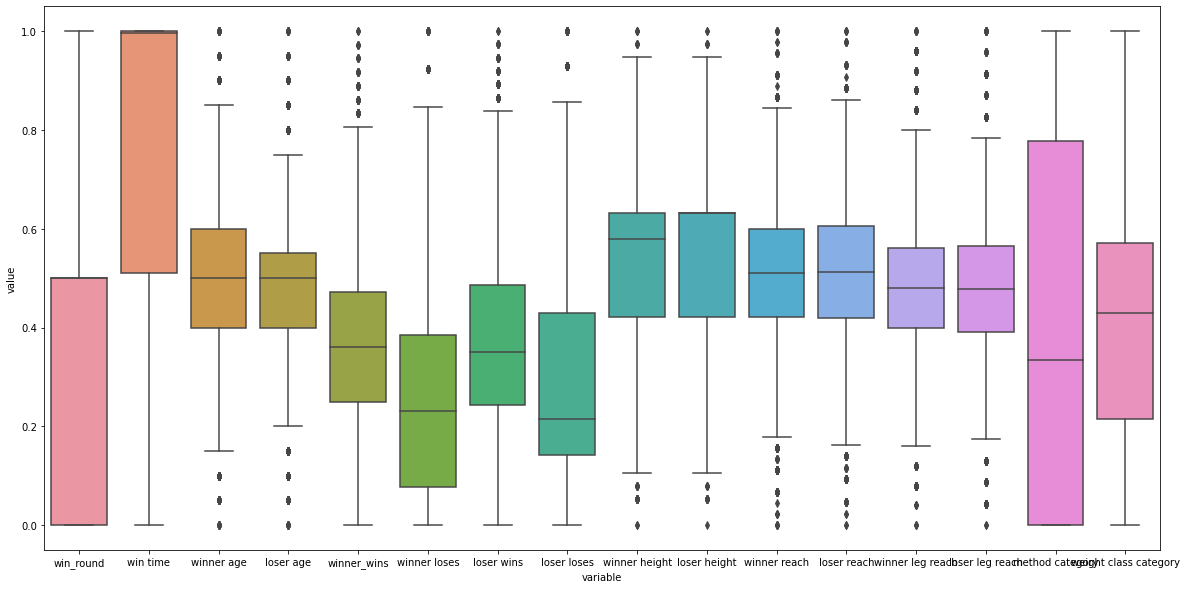

In [7]:
#boxplot - view outlires

fig, ax = plt.subplots(figsize=(20,10)) 
sns.boxplot(x="variable", y="value", data=pd.melt(normalized_df), ax=ax)

plt.show()

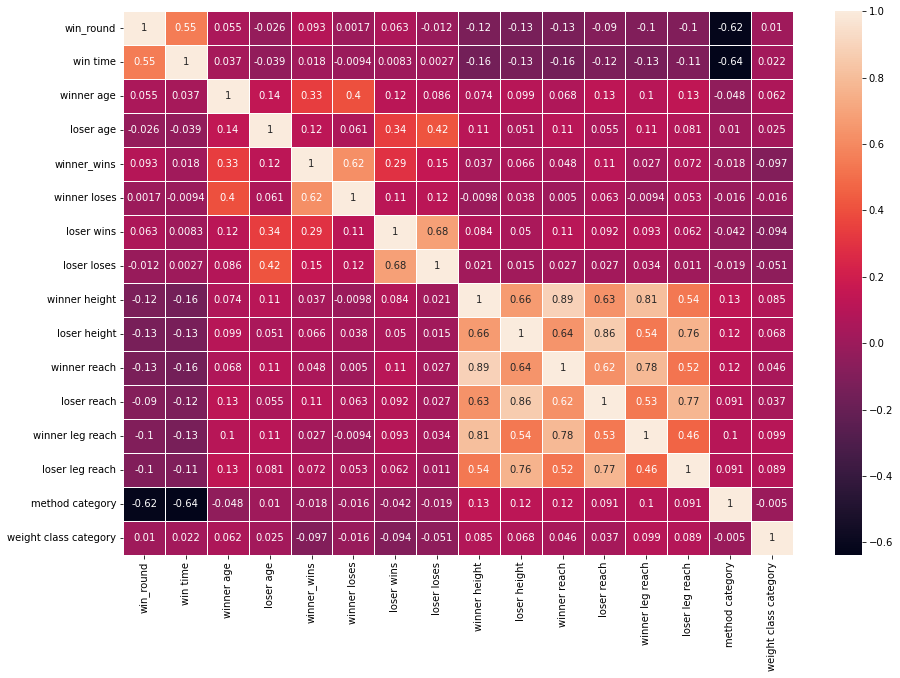

In [8]:
#heatmap

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_numeric.corr(), annot=True,linewidths=1, ax=ax)

plt.show()

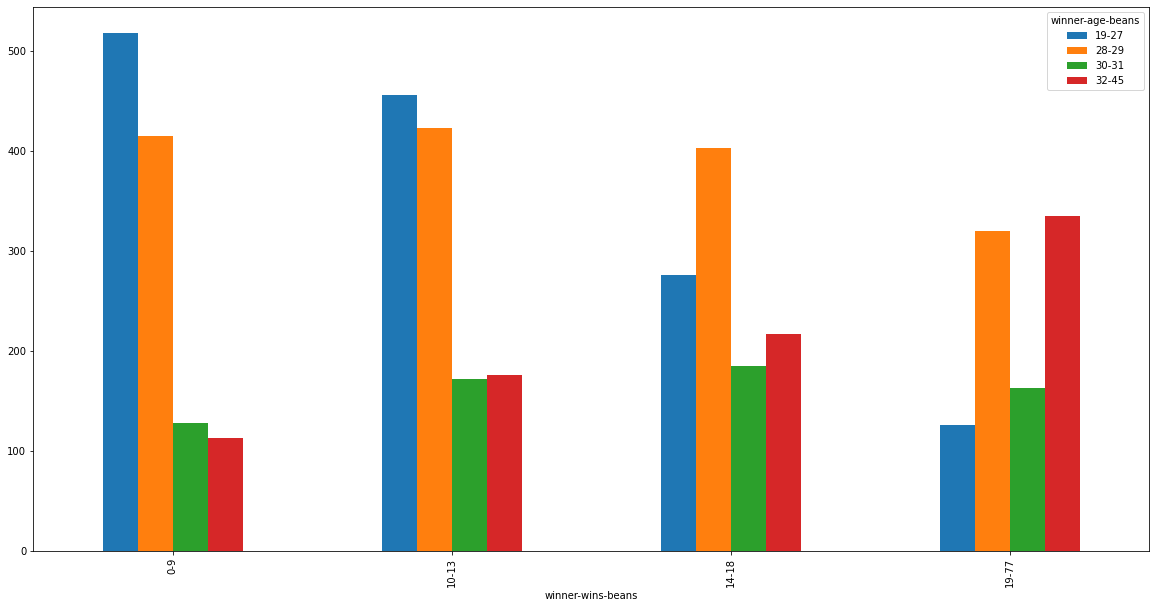

In [9]:
# age -> 19 - 45
bins = [18,27,29,31,45]
labels = ["19-27",'28-29','30-31','32-45']
df_copy['winner-age-beans'] = pd.cut(df_copy['winner age'], bins = bins,labels=labels)

#winner wins -> 0 - 77
bins = [-1,9,13,18,77]
labels = ["0-9",'10-13','14-18','19-77']
df_copy['winner-wins-beans'] = pd.cut(df_copy['winner_wins'], bins = bins,labels=labels)

ct = pd.crosstab(df_copy['winner-wins-beans'],df_copy['winner-age-beans'])
ax = ct.plot(kind = 'bar',figsize = (20,10))
plt.show()

<AxesSubplot:title={'center':'pie chart by finish method'}, ylabel='method category'>

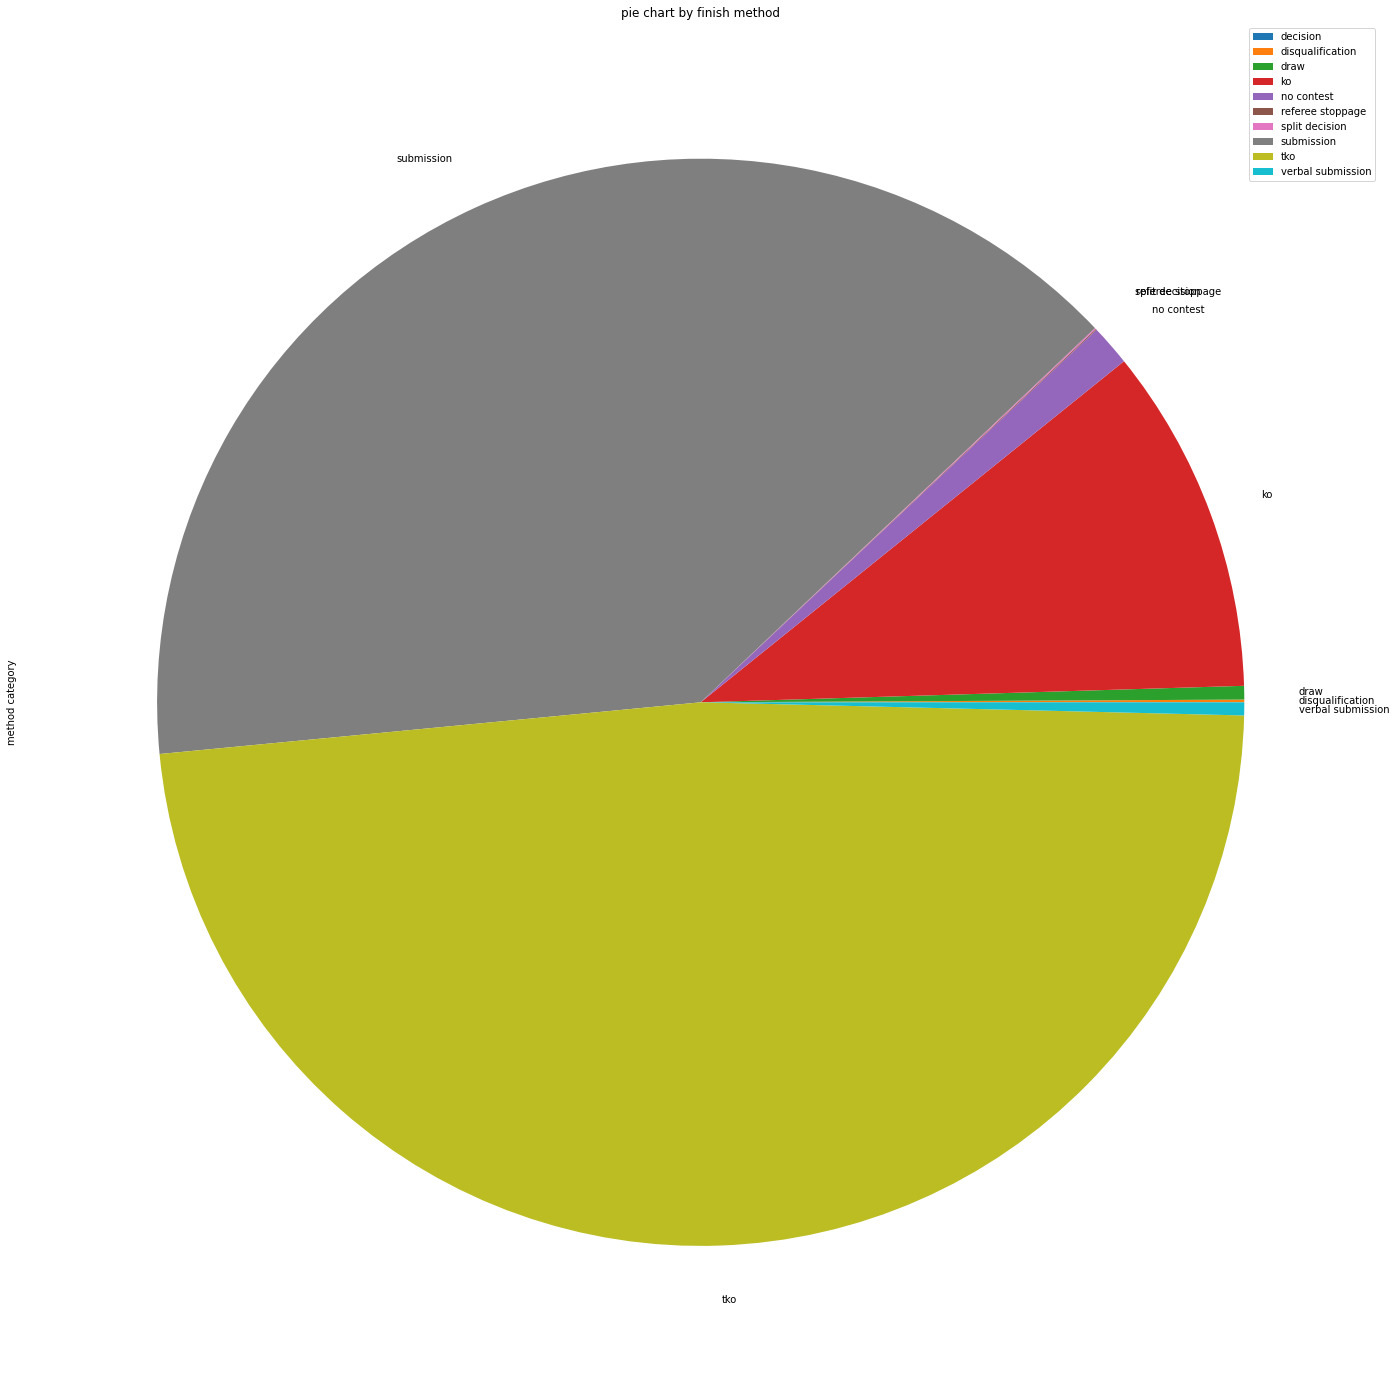

In [10]:
# pie chart

new_df = df.copy()

new_df.groupby(['method']).sum().plot(kind='pie', y='method category', figsize=(25,25), title='pie chart by finish method')


In [11]:
#merge dataframes

winners_df = df_copy[["win_round", "win time", "winner age",
                      "winner_wins", "winner loses", "winner height",
                      "winner reach","winner leg reach"]].copy()

losers_df = df_copy[["win_round", "win time", "loser age",
                      "loser wins", "loser loses", "loser height",
                      "loser reach","loser leg reach"]].copy()

winners_df['class'] = 1
losers_df['class'] = 0

#fix columns names
winners_df.rename(columns = {'win_round':'win round', 'winner age':'age',
                             'winner_wins': 'wins', 'winner loses': 'loses',
                             'winner height':'height','winner reach':'reach',
                             'winner leg reach':'leg reach'}, inplace = True)

losers_df.rename(columns = {'win_round':'win round', 'loser age':'age',
                             'loser wins': 'wins', 'loser loses': 'loses',
                             'loser height':'height','loser reach':'reach',
                             'loser leg reach':'leg reach'}, inplace = True)

all_df = pd.concat([winners_df, losers_df])

all_df

,win round,win time,age,wins,loses,height,reach,leg reach,class
0,5.0,300,30.0,12,2,68.0,68.0,39.5,1
1,3.0,300,28.0,27,11,73.0,73.0,42.0,1
2,1.0,288,33.0,21,7,75.0,80.0,45.0,1
3,3.0,300,27.0,6,1,61.0,61.0,36.0,1
4,3.0,300,29.0,13,5,71.0,72.0,40.0,1
...,...,...,...,...,...,...,...,...,...
4867,2.0,96,30.0,0,0,72.0,72.0,40.0,0
4868,2.0,52,30.0,6,4,72.0,72.0,40.0,0
4869,2.0,177,30.0,14,2,72.0,72.0,40.0,0
4870,2.0,43,30.0,4,1,72.0,72.0,40.0,0


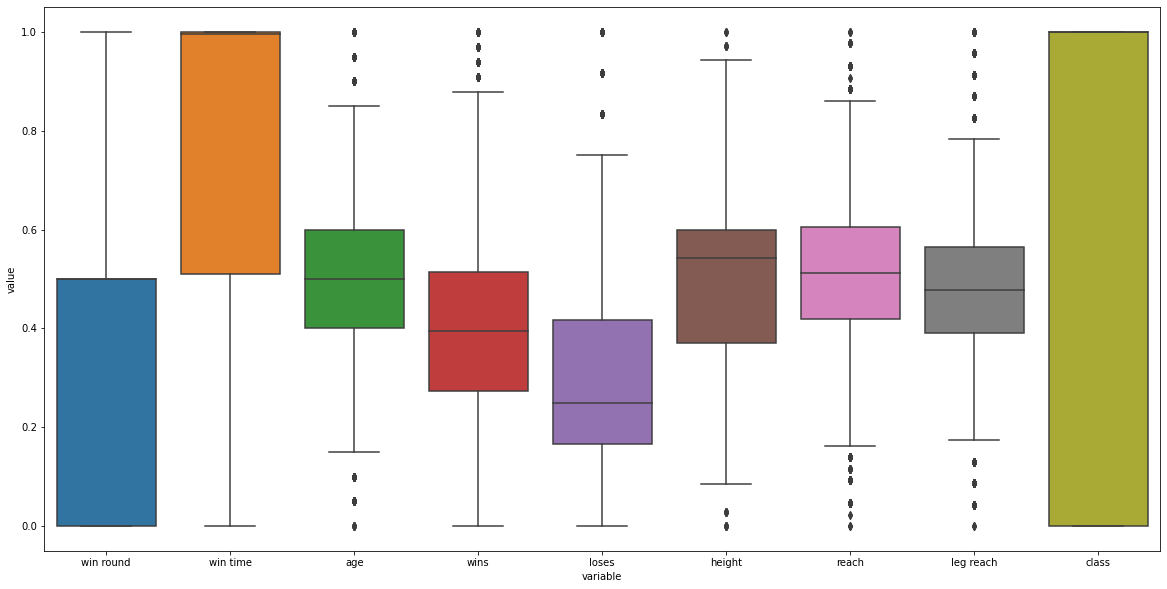

In [12]:
all_numeric_data = all_df.select_dtypes(include='number')

all_numeric_data = all_numeric_data[(np.abs(stats.zscore(all_numeric_data)) <= 3).all(axis=1)]

normalized_all_df=((all_numeric_data-all_numeric_data.min())/(all_numeric_data.max()-all_numeric_data.min())).copy()

fig, ax = plt.subplots(figsize=(20,10)) 
sns.boxplot(x="variable", y="value", data=pd.melt(normalized_all_df), ax=ax)

plt.show()

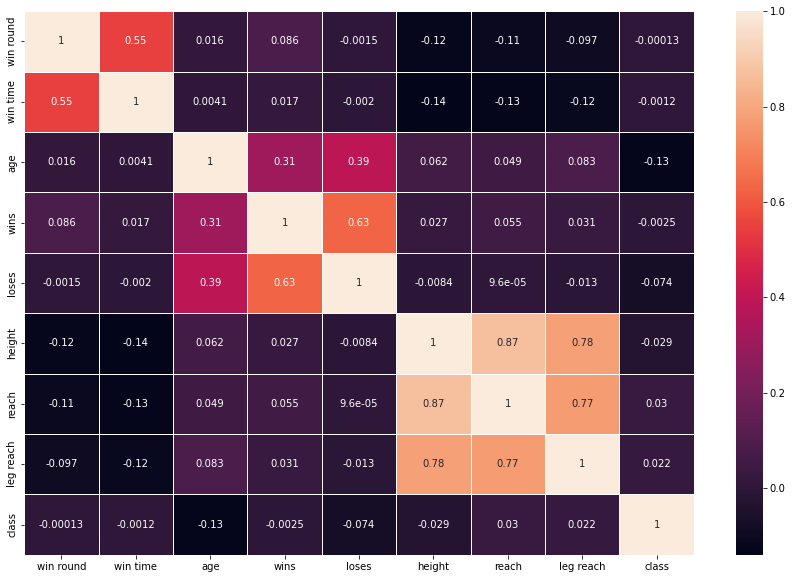

In [13]:
#heatmap

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(normalized_all_df.corr(), annot=True,linewidths=1, ax=ax)

plt.show()